In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
c1 = pd.read_csv("cluster.csv")

In [3]:
c1.columns

Index(['Points', 'x', 'y'], dtype='object')

In [4]:
x=c1["x"]
y=c1["y"]
Points=c1["Points"]

In [5]:
data = pd.DataFrame({'Points':Points, 'X':np.round(x,2), 'Y':np.round(y,2)})
data = data.set_index('Points')
data

,X,Y
Points,,
A1,2,10
A2,2,5
A3,8,4
A4,5,8
A5,7,5
A6,6,4
A7,1,2
A8,4,9


In [6]:
import numpy as np
from scipy.spatial.distance import cdist 

#Function to implement steps given in previous section
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
    
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
    
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
    
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)

        centroids = np.vstack(centroids) #Updated Centroids 
        
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
        
    return points 

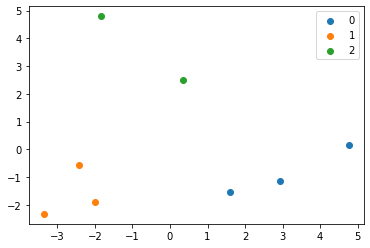

In [7]:
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 
#Defining function 
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] 
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') 
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) 
     
    #Repeating the above steps for a defined number of iterations
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points 
 
C1=c1.drop('Points',axis=1)
pca = PCA(2)
df = pca.fit_transform(C1)
 
#Applying our function
label = kmeans(df,3,1000)
 
#Visualize the results
 
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()